<a href="https://colab.research.google.com/github/HafizAQ/ML_Practices/blob/main/Association_Rule_Mining_and_Self_Organizing_Map(SOM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Courtesy: https://medium.com/analytics-vidhya/association-rule-mining-concept-and-implementation-28443d16f611

#Association Rule Mining
- Data mining technique to solve the **Market Basket Analysis Problem** (how the positioning of one item associates with the other items)
- Develop all possible associations of the products and select the most effective one for placement
- Identify the Occurance of the patterns in the dataset
- How do we find the effectiveness of the association rules? Apriori Algorithm (solution)
- Apriori Algorithm (R. Agrawal & Srikant): Support + Confidence + Lift
- Properties: Downward closure property means a subset of a frequent itemset should also be frequent + All infrequent item subset also has infrequent item superset

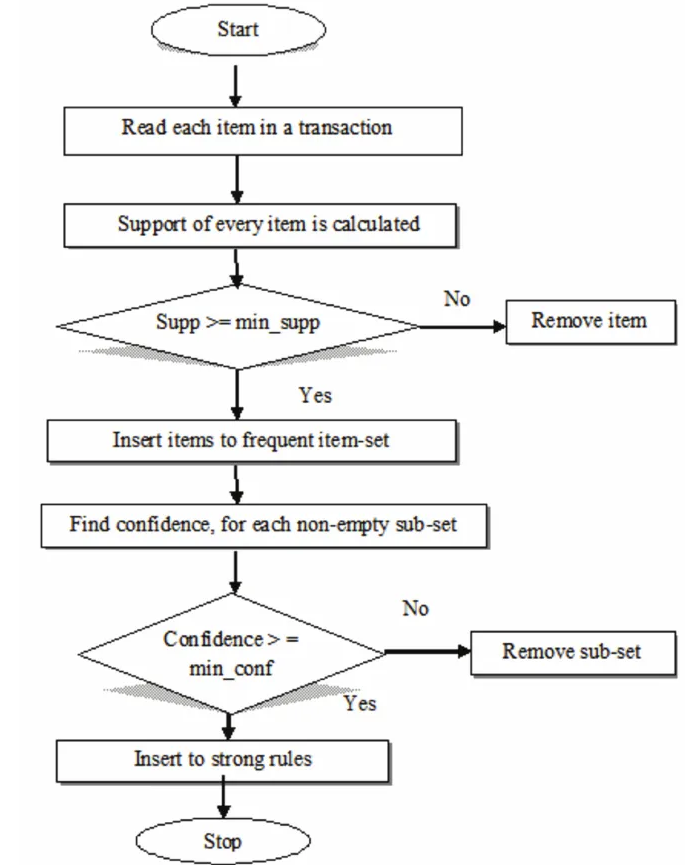

In [37]:
!pip install mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:

import mlxtend
from mlxtend.frequent_patterns import apriori
# from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder # This line should work after install
from mlxtend.frequent_patterns import apriori, association_rules #Apriori Algorithm

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
#Read data
market_basket_df = pd.read_csv('Market_Basket_Optimisation.csv', header=None)
market_basket_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#basket items, pre-processing
basket_items = []
for index, row in market_basket_df.iterrows():
   cleansed_items = [item for item in row if str(item)!='nan']
   basket_items.append(cleansed_items)
basket_items[:3]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney']]

In [43]:
tran_encod = TransactionEncoder()
tran_encod_list = tran_encod.fit(basket_items).transform(basket_items)
transaction_df = pd.DataFrame(tran_encod_list, columns=tran_encod.columns_)
transaction_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,escalope,extra dark chocolate,flax seed,french fries,french wine,fresh bread,fresh tuna,fromage blanc,frozen smoothie,frozen vegetables,gluten free bar,grated cheese,green beans,green grapes,green tea,ground beef,gums,ham,hand protein bar,herb & pepper,honey,hot dogs,ketchup,light cream,light mayo,low fat yogurt,magazines,mashed potato,mayonnaise,meatballs,melons,milk,mineral water,mint,mint green tea,muffins,mushroom cream sauce,napkins,nonfat milk,oatmeal,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [44]:
#Creating DataFrame for item frequecy
item_count = {}
for col in transaction_df.columns:
    item_count[col] = transaction_df[col].sum()
item_freq_df = pd.DataFrame(data=list(item_count.values()), index=list(item_count.keys()), columns=['frequency']).sort_values(by='frequency', ascending=False)
item_freq_df.shape, item_freq_df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


((120, 1),
                    frequency
 mineral water           1788
 eggs                    1348
 spaghetti               1306
 french fries            1282
 chocolate               1229
 green tea                991
 milk                     972
 ground beef              737
 frozen vegetables        715
 pancakes                 713)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 [Text(0.0, 0, '0'),
  Text(250.0, 0, '250'),
  Text(500.0, 0, '500'),
  Text(750.0, 0, '750'),
  Text(1000.0, 0, '1000'),
  Text(1250.0, 0, '1250'),
  Text(1500.0, 0, '1500'),
  Text(1750.0, 0, '1750'),
  Text(2000.0, 0, '2000')])

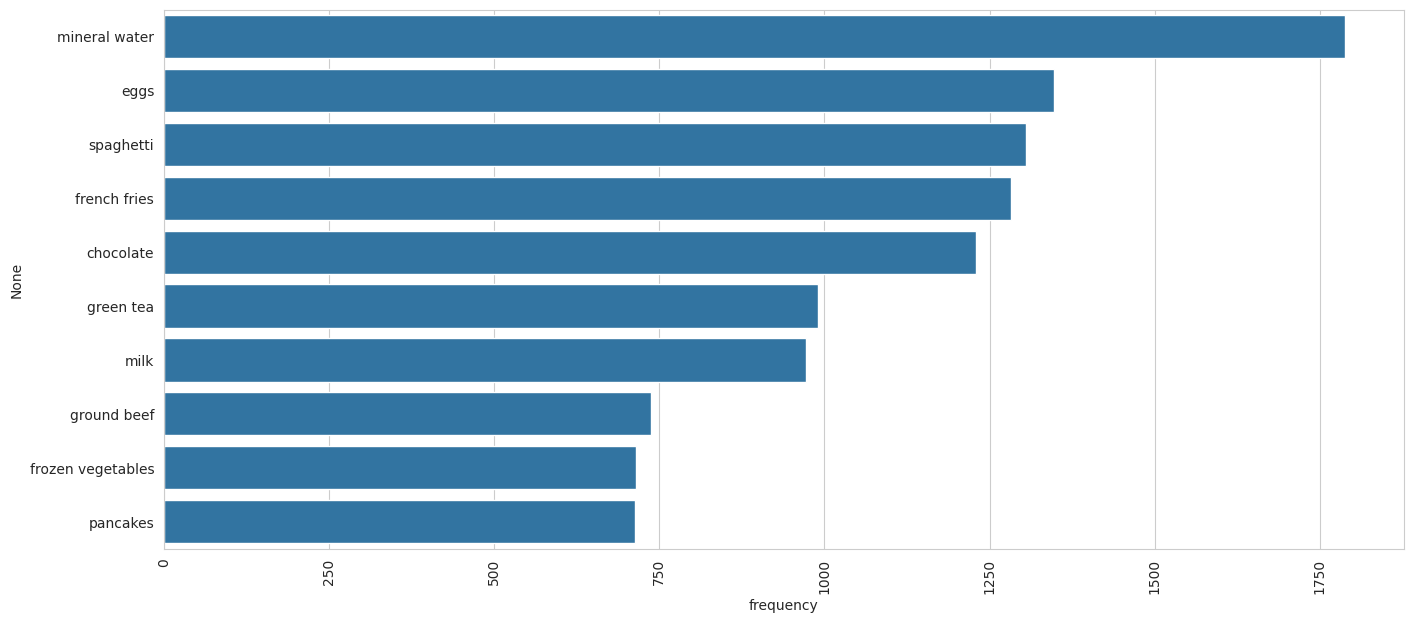

In [45]:
#Frequency in bar plot
plt.figure(figsize=(16,7))
sns.barplot(y=item_freq_df.index[:10], x=item_freq_df.frequency[:10])
plt.xticks(rotation=90)

In [46]:
#ii) transition -> Calculate Support, min_support, use_column

apriori(transaction_df,min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.163845,(chocolate)
1,0.179709,(eggs)
2,0.170911,(french fries)
3,0.132116,(green tea)
4,0.129583,(milk)
5,0.238368,(mineral water)
6,0.174110,(spaghetti)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


from matplotlib import pyplot as plt
_df_0['support'].plot(kind='hist', bins=20, title='support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('itemsets').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['support'].plot(kind='line', figsize=(8, 4), title='support')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['itemsets'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='support', y='itemsets', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [49]:
print(f'freq>200: {item_freq_df[item_freq_df.frequency>200].shape[0]} items')
print(f'freq>100: {item_freq_df[item_freq_df.frequency>100].shape[0]} items')
print(f'freq>50: {item_freq_df[item_freq_df.frequency>50].shape[0]} items')

freq>200: 41 items
freq>100: 66 items
freq>50: 92 items


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
#Supportset
pd.set_option("display.max_rows", 15)
freq_itemset_support = apriori(transaction_df, min_support=0.03, use_colnames=True)
freq_itemset_support

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.033329,(avocado)
1,0.033729,(brownies)
2,0.087188,(burgers)
3,0.030129,(butter)
4,0.081056,(cake)
...,...,...
49,0.039195,"(spaghetti, ground beef)"
50,0.047994,"(mineral water, milk)"
51,0.035462,"(spaghetti, milk)"
52,0.033729,"(mineral water, pancakes)"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


from matplotlib import pyplot as plt
freq_itemset_support['support'].plot(kind='hist', bins=20, title='support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
freq_itemset_support['support'].plot(kind='line', figsize=(8, 4), title='support')
plt.gca().spines[['top', 'right']].set_visible(False)

In [51]:
#min_confidence score as 20%
overal_association_rules = association_rules(freq_itemset_support, metric="confidence", min_threshold=0.2)
overal_association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(chocolate),(eggs),0.163845,0.179709,0.033196,0.202604,1.127397,0.003751,1.028711,0.135143
1,(chocolate),(french fries),0.163845,0.170911,0.034395,0.209927,1.228284,0.006393,1.049383,0.222275
2,(french fries),(chocolate),0.170911,0.163845,0.034395,0.201248,1.228284,0.006393,1.046827,0.224169
3,(milk),(chocolate),0.129583,0.163845,0.032129,0.247942,1.513276,0.010898,1.111823,0.389677
4,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
...,...,...,...,...,...,...,...,...,...,...
22,(spaghetti),(milk),0.174110,0.129583,0.035462,0.203675,1.571779,0.012900,1.093043,0.440468
23,(milk),(spaghetti),0.129583,0.174110,0.035462,0.273663,1.571779,0.012900,1.137061,0.417935
24,(pancakes),(mineral water),0.095054,0.238368,0.033729,0.354839,1.488616,0.011071,1.180529,0.362712
25,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437


In [52]:
#Mineral water is already associated with most of the product, find out other meaningful associated rules

trans_wo_water_df = transaction_df.drop(columns=['mineral water'])
freq_itemset_wo_water_supp = apriori(trans_wo_water_df, min_support=0.02, use_colnames=True)
freq_itemset_wo_water_supp

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.033729,(brownies)
3,0.087188,(burgers)
4,0.030129,(butter)
...,...,...
77,0.035462,"(spaghetti, milk)"
78,0.022930,"(spaghetti, olive oil)"
79,0.025197,"(spaghetti, pancakes)"
80,0.021197,"(shrimp, spaghetti)"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


from matplotlib import pyplot as plt
freq_itemset_wo_water_supp['support'].plot(kind='hist', bins=20, title='support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
freq_itemset_wo_water_supp['support'].plot(kind='line', figsize=(8, 4), title='support')
plt.gca().spines[['top', 'right']].set_visible(False)

In [53]:
#Water associate rule
water_association_rules = association_rules(freq_itemset_wo_water_supp, metric="confidence", min_threshold=0.2)
water_association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,0.499424
1,(burgers),(french fries),0.087188,0.170911,0.021997,0.252294,1.476173,0.007096,1.108844,0.353384
2,(burgers),(spaghetti),0.087188,0.174110,0.021464,0.246177,1.413918,0.006283,1.095602,0.320707
3,(chocolate),(eggs),0.163845,0.179709,0.033196,0.202604,1.127397,0.003751,1.028711,0.135143
4,(chocolate),(french fries),0.163845,0.170911,0.034395,0.209927,1.228284,0.006393,1.049383,0.222275
...,...,...,...,...,...,...,...,...,...,...
27,(milk),(spaghetti),0.129583,0.174110,0.035462,0.273663,1.571779,0.012900,1.137061,0.417935
28,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186
29,(pancakes),(spaghetti),0.095054,0.174110,0.025197,0.265077,1.522468,0.008647,1.123778,0.379218
30,(shrimp),(spaghetti),0.071457,0.174110,0.021197,0.296642,1.703760,0.008756,1.174209,0.444850


In [55]:
#order it by _confidence_ and _lift_
water_association_rules.sort_values('confidence', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
25,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
28,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186
0,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,0.499424
31,(tomatoes),(spaghetti),0.068391,0.174110,0.020931,0.306043,1.757755,0.009023,1.190117,0.462740
30,(shrimp),(spaghetti),0.071457,0.174110,0.021197,0.296642,1.703760,0.008756,1.174209,0.444850
...,...,...,...,...,...,...,...,...,...,...
16,(eggs),(spaghetti),0.179709,0.174110,0.036528,0.203264,1.167446,0.005239,1.036592,0.174852
3,(chocolate),(eggs),0.163845,0.179709,0.033196,0.202604,1.127397,0.003751,1.028711,0.135143
11,(eggs),(french fries),0.179709,0.170911,0.036395,0.202522,1.184961,0.005681,1.039640,0.190286
5,(french fries),(chocolate),0.170911,0.163845,0.034395,0.201248,1.228284,0.006393,1.046827,0.224169


In [59]:
#_lift_
water_association_rules.sort_values('lift', ascending=False)
# water_association_rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
24,(spaghetti),(ground beef),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716,0.682343
25,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
28,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186
20,(frozen vegetables),(milk),0.095321,0.129583,0.023597,0.247552,1.910382,0.011245,1.156781,0.526755
0,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,0.499424
...,...,...,...,...,...,...,...,...,...,...
11,(eggs),(french fries),0.179709,0.170911,0.036395,0.202522,1.184961,0.005681,1.039640,0.190286
16,(eggs),(spaghetti),0.179709,0.174110,0.036528,0.203264,1.167446,0.005239,1.036592,0.174852
17,(spaghetti),(eggs),0.174110,0.179709,0.036528,0.209801,1.167446,0.005239,1.038081,0.173666
22,(green tea),(spaghetti),0.132116,0.174110,0.026530,0.200807,1.153335,0.003527,1.033405,0.153188
